In [1]:
import torch

In [2]:
# speech activity detection model trained on AMI training set
sad = torch.hub.load('pyannote/pyannote-audio', 'sad_ami')
# speaker change detection model trained on AMI training set
scd = torch.hub.load('pyannote/pyannote-audio', 'scd_ami')
# overlapped speech detection model trained on AMI training set
ovl = torch.hub.load('pyannote/pyannote-audio', 'ovl_ami')
# speaker embedding model trained on AMI training set
emb = torch.hub.load('pyannote/pyannote-audio', 'emb_ami')

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master


  0%|          | 0.00/2.41M [00:00<?, ?B/s]

Using cache found in /Users/jauffret/.cache/torch/hub/pyannote_pyannote-audio_master
/Users/jauffret/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pyannote/audio/embedding/approaches/arcface_loss.py:170: FutureWarning: The 's' parameter is deprecated in favor of 'scale', and will be removed in a future release
  warnings.warn(msg, FutureWarning)


In [3]:
test_file = {'uri': 'martin2.wac', 'audio': 'data/martin2.wav'}

In [4]:
sad_scores = sad(test_file)

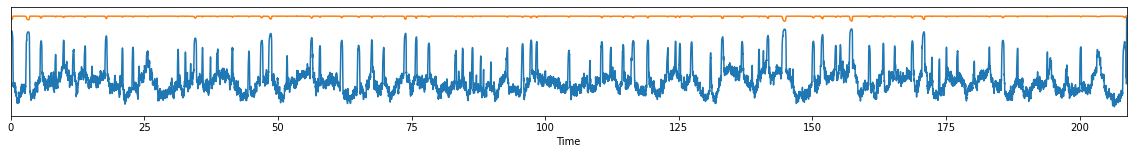

In [5]:
sad_scores

In [8]:
from pyannote.audio.utils.signal import Binarize
binarize = Binarize(offset=0.52, onset=0.52, log_scale=True, 
                    min_duration_off=0.1, min_duration_on=0.1)
speech = binarize.apply(sad_scores, dimension=1)

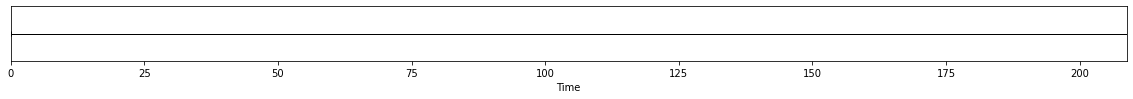

In [9]:
speech

In [6]:
scd_score = scd(test_file)

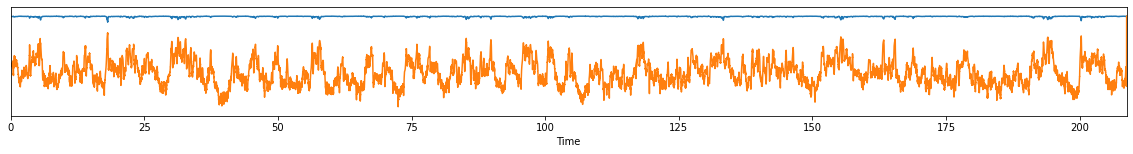

In [12]:
scd_score

In [13]:
from pyannote.audio.utils.signal import Peak
peak = Peak(alpha=0.10, min_duration=0.10, log_scale=True)


In [15]:
partition = peak.apply(scd_score, dimension=1)

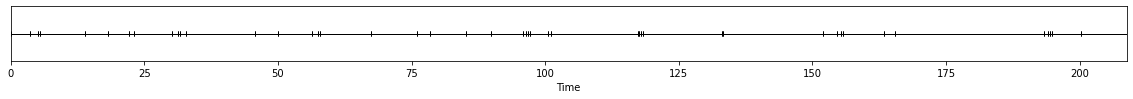

In [16]:
partition